In [1]:
import scanpy as sc

# Read the h5ad file created from Seurat
protein_data = sc.read_h5ad("data/processed/atac-match.h5ad")
rna_data = sc.read_h5ad("data/processed/rna-match.h5ad")

print(protein_data)
print(rna_data)

AnnData object with n_obs × n_vars = 9631 × 13205
    obs: 'domain', 'protocol', 'dataset', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters', 'sub.cluster', 'cell_type', 'balancing_weight'
    var: 'feature_types', 'genome', 'chrom', 'chromStart', 'chromEnd', 'n_counts', 'highly_variable'
    uns: '__scglue__'
    obsm: 'X_glue', 'X_lsi', 'X_match'
    varm: 'X_glue'
AnnData object with n_obs × n_vars = 9631 × 29095
    obs: 'domain', 'protocol', 'dataset', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'wsnn_res.0.8', 'seurat_clusters', 'sub.cluster', 'cell_type', 'balancing_weight'
    var: 'gene_ids', 'feature_types', 'genome', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes'

1 round cc 46


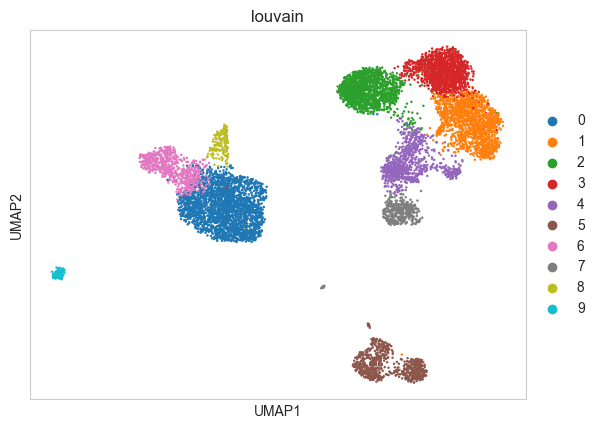

In [2]:
import mojitoo
import scanpy as sc

adt = protein_data
rna = rna_data


protein_data.obsm["pr"] = rna.obsm["X_match"]
protein_data.obsm["peak"] = adt.obsm["X_match"]


mojitoo.mojitoo(protein_data, reduction_list=["pr", "peak"],  dims_list=(range(50), range(1,50)),reduction_name='mojitoo', overwrite=True)

sc.pp.neighbors(protein_data, use_rep='mojitoo')
sc.tl.louvain(protein_data, resolution=0.5)
sc.tl.umap(protein_data)
sc.pl.embedding(protein_data, color='louvain', basis='umap')



In [4]:

gt = protein_data.obs['cell_type'].tolist()
pred = protein_data.obs['louvain'].tolist()

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(gt, pred)
nmi = normalized_mutual_info_score(gt, pred)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.7811118471231856
Normalized Mutual Information: 0.8151469969457704
